In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.set_cmap("viridis")
font = {'size'   : 15}

matplotlib.rc('font', **font)
markersize = 15

<Figure size 640x480 with 0 Axes>

In [3]:
algorithms = ['CDS-Simple-Lam', 'CDS-GK96', 'CDS-WAF02', 'CDS-Lam-Congest']
result_dir = "results_cds"
n_tests = 50

In [4]:
failed = {algorithm : [] for algorithm in algorithms}

In [5]:
list_n = list(range(100, 2001, 100))

In [6]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_selected_nodes = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            n_success = 0
            for i in range(n_tests):
                result_file = f"{result_dir}/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                if not os.path.isfile(result_file):
                    print(f"Algorithm {algorithm} failed at input {result_file}!")
                    failed[algorithm].append(result_file)
                    continue
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                        failed[algorithm].append(result_file)
                        continue
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    if algorithm == "CDS-Lam-Congest":
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                    all_n_selected_nodes[algorithm][n] += n_selected_nodes
                    n_success += 1
                        
            all_n_active_rounds[algorithm][n] /= n_success
            all_n_average_awake_rounds[algorithm][n] /= n_success
            all_n_selected_nodes[algorithm][n] /= n_success
            
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)
            all_n_selected_nodes[algorithm][n] = np.round(all_n_selected_nodes[algorithm][n], 2)

Algorithm CDS-GK96 failed at input results_cds/1900/sparse/CDS-GK96_005.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1700/sparse/CDS-Lam-Congest_037.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_005.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_009.txt!
Algorithm CDS-Lam-Congest failed at input results_cds/1900/sparse/CDS-Lam-Congest_023.txt!


In [7]:
pprint(all_n_active_rounds)

{'CDS-GK96': {100: 76.58,
              200: 116.76,
              300: 141.74,
              400: 156.36,
              500: 172.5,
              600: 197.72,
              700: 223.9,
              800: 234.7,
              900: 251.88,
              1000: 271.06,
              1100: 270.48,
              1200: 298.78,
              1300: 308.1,
              1400: 327.38,
              1500: 324.62,
              1600: 325.6,
              1700: 337.64,
              1800: 356.34,
              1900: 386.57,
              2000: 373.1},
 'CDS-Lam-Congest': {100: 323.12,
                     200: 583.2,
                     300: 736.74,
                     400: 902.0,
                     500: 975.0,
                     600: 1221.12,
                     700: 1475.42,
                     800: 1514.26,
                     900: 1680.28,
                     1000: 1782.84,
                     1100: 1981.7,
                     1200: 2101.14,
                     1300: 2273.78,
     

In [8]:
pprint(all_n_average_awake_rounds)

{'CDS-GK96': {100: 76.58,
              200: 116.76,
              300: 141.74,
              400: 156.36,
              500: 172.5,
              600: 197.72,
              700: 223.9,
              800: 234.7,
              900: 251.88,
              1000: 271.06,
              1100: 270.48,
              1200: 298.78,
              1300: 308.1,
              1400: 327.38,
              1500: 324.62,
              1600: 325.6,
              1700: 337.64,
              1800: 356.34,
              1900: 386.57,
              2000: 373.1},
 'CDS-Lam-Congest': {100: 47.27,
                     200: 56.76,
                     300: 60.1,
                     400: 63.3,
                     500: 62.28,
                     600: 68.48,
                     700: 73.84,
                     800: 74.68,
                     900: 76.17,
                     1000: 77.0,
                     1100: 79.02,
                     1200: 79.1,
                     1300: 81.15,
                     1400:

In [9]:
pprint(all_n_selected_nodes)

{'CDS-GK96': {100: 35.94,
              200: 71.1,
              300: 107.52,
              400: 136.66,
              500: 162.84,
              600: 201.66,
              700: 236.34,
              800: 268.42,
              900: 295.36,
              1000: 331.82,
              1100: 361.92,
              1200: 392.54,
              1300: 411.78,
              1400: 444.72,
              1500: 475.04,
              1600: 493.0,
              1700: 524.62,
              1800: 565.08,
              1900: 595.53,
              2000: 640.18},
 'CDS-Lam-Congest': {100: 36.5,
                     200: 71.74,
                     300: 108.38,
                     400: 137.18,
                     500: 163.6,
                     600: 202.16,
                     700: 236.98,
                     800: 269.06,
                     900: 296.1,
                     1000: 332.46,
                     1100: 362.24,
                     1200: 393.16,
                     1300: 412.56,
           

In [10]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/cds_average_awake.csv")
df_average_awake

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,24.28,76.58,55.56,47.27
200,24.94,116.76,76.24,56.76
300,27.56,141.74,92.18,60.10
400,27.26,156.36,98.70,63.30
500,27.74,172.50,111.04,62.28
600,29.10,197.72,119.72,68.48
700,29.02,223.90,136.42,73.84
800,29.08,234.70,137.72,74.68
900,30.42,251.88,142.58,76.17
1000,30.88,271.06,153.92,77.00


In [11]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/cds_active_rounds.csv")
df_active_rounds

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,24.28,76.58,55.56,323.12
200,24.94,116.76,76.24,583.20
300,27.56,141.74,92.18,736.74
400,27.26,156.36,98.70,902.00
500,27.74,172.50,111.04,975.00
600,29.10,197.72,119.72,1221.12
700,29.02,223.90,136.42,1475.42
800,29.08,234.70,137.72,1514.26
900,30.42,251.88,142.58,1680.28
1000,30.88,271.06,153.92,1782.84


In [12]:
df_cds_size = pd.DataFrame(all_n_selected_nodes)
df_cds_size.to_csv("stat/cds_size.csv")
df_cds_size

,CDS-Simple-Lam,CDS-GK96,CDS-WAF02,CDS-Lam-Congest
100,56.86,35.94,33.82,36.50
200,114.90,71.10,67.20,71.74
300,178.82,107.52,103.16,108.38
400,238.60,136.66,131.70,137.18
500,289.06,162.84,159.28,163.60
600,356.66,201.66,199.08,202.16
700,415.92,236.34,234.10,236.98
800,480.14,268.42,264.68,269.06
900,538.00,295.36,293.36,296.10
1000,601.60,331.82,329.20,332.46


In [13]:
def plot_df(
    df,
    title=None,
    y_title=-0.2,
    figsize=(30,10),
    markersize=10,
    bbox_to_anchor=(0.5, 0, 0.4, 0.5),
    y_ticks=None,
    y_label=""
):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r = df.index.values[1::2]
    ax.plot(r, df["CDS-Simple-Lam"].values[1::2], marker='v', markersize=markersize, label="CDS-Simple")
    ax.plot(r, df["CDS-GK96"].values[1::2], marker='D', markersize=markersize, label="CDS-GK96")
    ax.plot(r, df["CDS-WAF02"].values[1::2], marker='o', markersize=markersize, label="CDS-WAF02")
    ax.plot(r, df["CDS-Lam-Congest"].values[1::2], marker='x', markersize=markersize, label="CDS-Ours")
    
    ax.set_yticks(y_ticks)
    ax.set_ylabel(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    if title is not None: ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    fig.legend(handles, labels, bbox_to_anchor=bbox_to_anchor)
    plt.grid()
    return ax

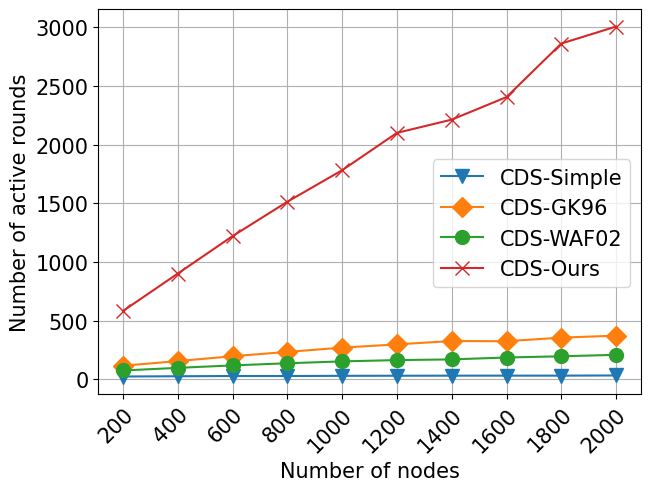

In [20]:
plot_df(df_active_rounds, figsize=(7,5), bbox_to_anchor=(0.5, 0, 0.4, 0.6), y_ticks=np.arange(0, 3500, 500),
        y_label="Number of active rounds")
plt.savefig("stat/cds_active_rounds.pdf", bbox_inches="tight")

In [15]:
def plot_df_awake_rounds(
    df,
    title="Number of average awake rounds of different CDS algorithms",
    y_title=-0.2
):
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    r = df.index.values[1::2]
    ax.plot(r, df["CDS-Simple-Lam"].values[1::2], marker='o', markersize=markersize, label="CDS-Simple")
    ax.plot(r, df["CDS-GK96"].values[1::2], marker='v', markersize=markersize, label="CDS-GK96")
    ax.plot(r, df["CDS-WAF02"].values[1::2], marker='D', markersize=markersize, label="CDS-WAF02")
    ax.plot(r, df["CDS-Lam-Congest"].values[1::2], marker='x', markersize=markersize, label="CDS-Ours")
    ax.set_yticks(np.arange(0,400,50))
    ax.set_ylabel("Number of average awake rounds")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    plt.grid()
    return ax

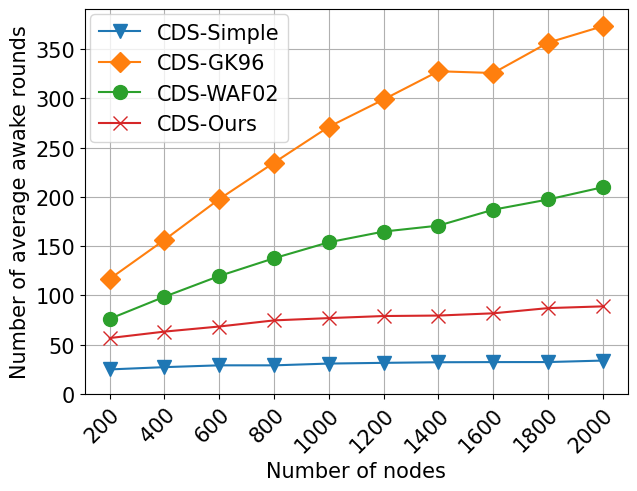

In [30]:
plot_df(df_average_awake, figsize=(7,5), bbox_to_anchor=(0, 0, 0.43, 0.89), y_ticks=np.arange(0, 400, 50),
        y_label="Number of average awake rounds")
plt.savefig("stat/cds_average_awake.pdf", bbox_inches="tight")

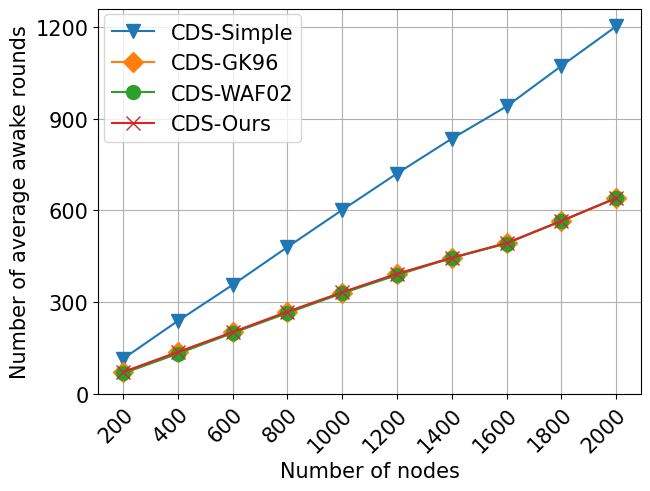

In [31]:
plot_df(df_cds_size, figsize=(7,5), bbox_to_anchor=(0, 0, 0.43, 0.89), y_ticks=np.arange(0, 1500, 300),
        y_label="Number of average awake rounds")
plt.savefig("stat/cds_size.pdf", bbox_inches="tight")